In [ ]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

2.0.0+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 80.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


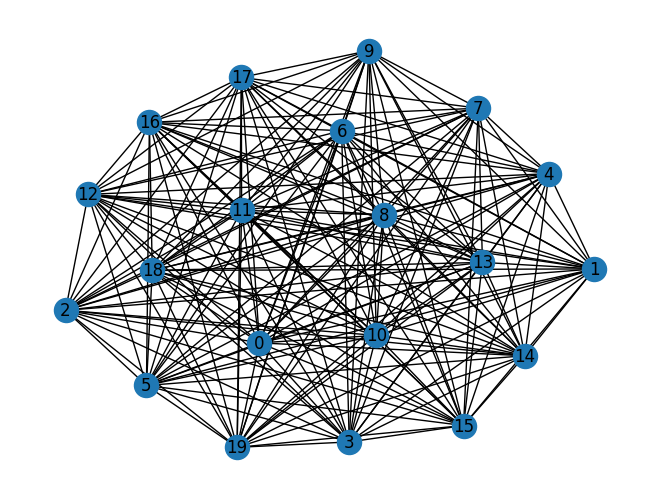

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
n = 20
p = 0.5

# Create the graph
G = nx.complete_graph(n)

# Visualize the graph
nx.draw(G, with_labels=True)
plt.savefig('My_Dataset_complete.png')

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import shutil
import torch
import random
from google.colab import drive
from random import shuffle
from torch.nn import Linear
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch_geometric.nn import global_mean_pool
from torch_geometric.data import Data, Dataset
from torch_geometric.loader import DataLoader
from torch_geometric.data import InMemoryDataset
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [ ]:
# 500 graphs are generated
num_graphs = 5000
# Number of features for each node
num_features = 10
# Number of classes either 0/1
num_classes = 2

# Data Generation

In [ ]:
datasetg1 = []

# We take 200 for scale free network (Barabasi albert graph)
for i in range(0,2000):
    n = np.random.randint(30, 100)
    m = np.random.randint(2, 4)
    G1 = nx.barabasi_albert_graph(n,m)
    Ag1 = nx.adjacency_matrix(G1)
    Ag1 = torch.tensor(Ag1.todense())   # Creating Adjacency matrix from graph

    row, col = torch.nonzero(Ag1, as_tuple=True)
    edge_indexg1 = torch.stack([row, col], dim=0) # Creating Edge_index from graph

    xg1 = torch.randint(low=0, high=2, size=(len(Ag1), num_features), dtype=torch.float)   # Creating Feature matrix using number of features
    yg1 = torch.tensor(np.random.randint(1, 2))  # Creating Labels

    datag1 = Data(x = xg1, edge_index = edge_indexg1.contiguous(), edge_attr = None, y = yg1, pos =  None)
    datasetg1.append(datag1)

    #nx.draw(G1, with_labels = True)
    #plt.savefig('barabasi_albert_graph.png')
    #plt.show()

In [ ]:
datasetg2 = []

# We take 200 for random network (Erdos renyis graph)
for i in range(0,2000):
    n = np.random.randint(30, 100)
    p = np.random.uniform(0.1, 0.3)
    G2 = nx.erdos_renyi_graph(n, p)

    sel = any(G2.has_edge(j, j) for j in G2.nodes())
    while sel == True:
          n = np.random.randint(30, 100)
          p = np.random.uniform(0.1, 0.3)
          G2 = nx.erdos_renyi_graph(n, p)
          sel = any(G2.has_edge(j, j) for j in G2.nodes())

    con = nx.is_connected(G2)
    while con == False: # Checking if the graph is connected or not ?
          n = np.random.randint(30, 100)
          p = np.random.uniform(0.1, 0.3)
          G2 = nx.erdos_renyi_graph(n, p)
          con = nx.is_connected(G2)

    #avg_degree = sum(dict(G2.degree()).values()) / float(len(G2))
    #print(avg_degree)

    Ag2 = nx.adjacency_matrix(G2)
    Ag2 = torch.tensor(Ag2.todense())   # Creating Adjacency matrix from graph

    row, col = torch.nonzero(Ag2, as_tuple=True)
    edge_indexg2 = torch.stack([row, col], dim=0) # Creating Edge_index from graph

    xg2 = torch.randint(low=0, high=2, size=(len(Ag2), num_features), dtype=torch.float)   # Creating Feature matrix using number of features
    yg2 = torch.tensor(np.random.randint(0, 1))   # Creating Labels

    datag2 = Data(x = xg2, edge_index = edge_indexg2.contiguous(), edge_attr = None, y = yg2, pos =  None)
    datasetg2.append(datag2)

    #nx.draw(G2, with_labels = True)
    #plt.savefig('erdos_renyi_graph.png')
    #plt.show()

In [ ]:
dataset1 = []
dataset2 = []
dataset3 = []
dataset4 = []
dataset5 = []

# We take 100 for regular networks (star graph, wheel graph, cycle graph, complete graph, )
for i in range(0,200):
    n = np.random.randint(30, 100)
    a1 = nx.star_graph(n)
    A1 = nx.adjacency_matrix(a1)
    A1 = torch.tensor(A1.todense())

    row, col = torch.nonzero(A1, as_tuple=True)
    edge_index1 = torch.stack([row, col], dim=0) # Creating Edge_index from graph

    x1 = torch.randint(low=0, high=2, size=(len(A1), num_features), dtype=torch.float)   # Creating Feature matrix using number of features
    y1 = torch.tensor(np.random.randint(1, 2))   # Creating Labels

    data1 = Data(x = x1, edge_index = edge_index1.contiguous(), edge_attr = None, y = y1, pos =  None)
    dataset1.append(data1)

for i in range(0,200):
    n = np.random.randint(30, 100)
    a2 = nx.wheel_graph(n)
    A2 = nx.adjacency_matrix(a2)
    A2 = torch.tensor(A2.todense())

    row, col = torch.nonzero(A2, as_tuple=True)
    edge_index2 = torch.stack([row, col], dim=0) # Creating Edge_index from graph

    x2 = torch.randint(low=0, high=2, size=(len(A2), num_features), dtype=torch.float)   # Creating Feature matrix using number of features
    y2 = torch.tensor(np.random.randint(1, 2))   # Creating Labels

    data2 = Data(x = x2, edge_index = edge_index2.contiguous(), edge_attr = None, y = y2, pos =  None)
    dataset2.append(data2)

for i in range(0,200):
    n = np.random.randint(30, 100)
    a3 = nx.cycle_graph(n)
    A3 = nx.adjacency_matrix(a3)
    A3 = torch.tensor(A3.todense())

    row, col = torch.nonzero(A3, as_tuple=True)
    edge_index3 = torch.stack([row, col], dim=0) # Creating Edge_index from graph

    x3 = torch.randint(low=0, high=2, size=(len(A3), num_features), dtype=torch.float)   # Creating Feature matrix using number of features
    y3 = torch.tensor(np.random.randint(0, 1))   # Creating Labels

    data3 = Data(x = x3, edge_index = edge_index3.contiguous(), edge_attr = None, y = y3, pos =  None)
    dataset3.append(data3)

for i in range(0,200):
    n = np.random.randint(30, 100)
    a4 = nx.complete_graph(n)
    A4 = nx.adjacency_matrix(a4)
    A4 = torch.tensor(A4.todense())

    row, col = torch.nonzero(A4, as_tuple=True)
    edge_index4 = torch.stack([row, col], dim=0) # Creating Edge_index from graph

    x4 = torch.randint(low=0, high=2, size=(len(A4), num_features), dtype=torch.float)   # Creating Feature matrix using number of features
    y4 = torch.tensor(np.random.randint(0, 1))   # Creating Labels

    data4 = Data(x = x4, edge_index = edge_index4.contiguous(), edge_attr = None, y = y4, pos =  None)
    dataset4.append(data4)

for i in range(0,200):
    n = np.random.randint(30, 100)
    a5 = nx.path_graph(n)
    A5 = nx.adjacency_matrix(a5)
    A5 = torch.tensor(A5.todense())

    row, col = torch.nonzero(A5, as_tuple=True)
    edge_index5 = torch.stack([row, col], dim=0) # Creating Edge_index from graph

    x5 = torch.randint(low=0, high=2, size=(len(A5), num_features), dtype=torch.float)   # Creating Feature matrix using number of features
    y5 = torch.tensor(np.random.randint(1, 2))   # Creating Labels

    data5 = Data(x = x5, edge_index = edge_index5.contiguous(), edge_attr = None, y = y5, pos =  None)
    dataset5.append(data5)

datasetg3  = dataset1 + dataset2 + dataset3 + dataset4 + dataset5

'''

nx.draw(a1, with_labels = True)
plt.savefig('star_graph.png')
plt.show()

nx.draw(a2, with_labels = True)
plt.savefig('wheel_graph.png')
plt.show()

nx.draw(a3, with_labels = True)
plt.savefig('Cycle_graph.png')
plt.show()

nx.draw(a4, with_labels = True)
plt.savefig('complete_graph.png')
plt.show()

nx.draw(a5, with_labels = True)
plt.savefig('path_graph.png')
plt.show()

'''

"\n\nnx.draw(a1, with_labels = True)\nplt.savefig('star_graph.png')\nplt.show()\n\nnx.draw(a2, with_labels = True)\nplt.savefig('wheel_graph.png')\nplt.show()\n\nnx.draw(a3, with_labels = True)\nplt.savefig('Cycle_graph.png')\nplt.show()\n\nnx.draw(a4, with_labels = True)\nplt.savefig('complete_graph.png')\nplt.show()\n\nnx.draw(a5, with_labels = True)\nplt.savefig('path_graph.png')\nplt.show()\n\n"

In [ ]:

dataset = datasetg1 + datasetg2 + datasetg3
print(len(dataset))

5000


In [ ]:
print("Loc-Deloc Dataset")
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {num_features}')
print(f'Number of classes: {num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(type(dataset))
print(type(data.x))
print(type(data.edge_index))
print(type(data.y))
print(type(data.num_nodes))
print(type(data.num_edges))
print('=============================================================')

# Gather some statistics about the first graph.
print(data)
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')

Loc-Deloc Dataset
Number of graphs: 5000
Number of features: 10
Number of classes: 2

<class 'list'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'int'>
<class 'int'>
Data(x=[62, 10], edge_index=[2, 354], y=1)
Number of nodes: 62
Number of edges: 354


In [ ]:
#@title Adjacency Matrix
adj = []

for i in range(len(dataset)):
    graph_data = dataset[i]
    node_features = graph_data.x.numpy()
    edge_indices = graph_data.edge_index.numpy()
    num_nodes = node_features.shape[0]
    adj_matrix = np.zeros((num_nodes, num_nodes))
    for i in range(edge_indices.shape[1]):
        src = edge_indices[0, i]
        tgt = edge_indices[1, i]
        adj_matrix[src, tgt] = 1
        adj_matrix[tgt, src] = 1
    adj.append(adj_matrix)

In [ ]:
#@title Min & Max

Max = []
Min = []

for i in range(len(dataset)):
    node_degrees = np.sum(adj[i], axis=1)
    a = np.max(node_degrees)
    b = np.min(node_degrees)
    Max.append(int(a))
    Min.append(int(b))

In [ ]:
#@title AverageNodeDegree/NumNodes/NumEdges/Labels
graphs = []
avgnodedegree = []
NumNodes = []
NumEdges = []
labels = []

for i in range(len(dataset)):
  graphs.append(i+1)
  avgnodedegree.append(dataset[i].num_edges/dataset[i].num_nodes)
  NumNodes.append(dataset[i].num_nodes)
  NumEdges.append(dataset[i].num_edges)
  labels.append(np.array(dataset[i].y))

In [ ]:
#@title Number of Nodes Plot
plt.bar(graphs[:200], NumNodes[:200], color='#FF5733', label='Barabasi')
plt.bar(graphs[200:400], NumNodes[200:400], color='#F5B041', label='Erdos')
plt.bar(graphs[400:], NumNodes[400:], color='#5499C7', label='Random graphs')
plt.xlabel(r'$G_{i}$')
plt.ylabel(r'$N_{i}$')
plt.title('Number of Nodes')
plt.legend()
plt.savefig('Mydataset_Number of Nodes.png')
plt.show()

In [ ]:
#@title Number of Edges Plot
plt.bar(graphs[:200], NumEdges[:200], color='#FF5733', label='Barabasi')
plt.bar(graphs[200:400], NumEdges[200:400], color='#F5B041', label='Erdos')
plt.bar(graphs[400:], NumEdges[400:], color='#5499C7', label='Random graphs')
plt.xlabel(r'$G_{i}$')
plt.ylabel(r'$E_{i}$')
plt.title('Number of Edges')
plt.legend()
plt.savefig('Mydataset_Number of Edges.png')
plt.show()

In [ ]:
#@title Average_Node_degree Plot
plt.bar(graphs[:200], avgnodedegree[:200], color='#FF5733', label='Barabasi')
plt.bar(graphs[200:400], avgnodedegree[200:400], color='#F5B041', label='Erdos')
plt.bar(graphs[400:], avgnodedegree[400:], color='#5499C7', label='Random graphs')
plt.xlabel(r'$G_{i}$')
plt.ylabel(r'$k_{Avg}$')
plt.title('Average Node Degree')
plt.legend()
plt.savefig('Mydataset_AverageNodeDegree.png')
plt.show()

In [ ]:
#@title Max_degree Plot
plt.bar(graphs[:200], Max[:200], color='#FF5733', label='Barabasi')
plt.bar(graphs[200:400], Max[200:400], color='#F5B041', label='Erdos')
plt.bar(graphs[400:], Max[400:], color='#5499C7', label='Random graphs')
plt.xlabel(r'$G_{i}$')
plt.ylabel(r'$k_{max}$')
plt.title('Maximum Node Degrees')
plt.legend()
plt.savefig('Mydataset_MaximumNodeDegrees.png')
plt.show()

In [ ]:
#@title Min_degree Plot
plt.bar(graphs[:200], Min[:200], color='#FF5733', label='Barabasi')
plt.bar(graphs[200:400], Min[200:400], color='#F5B041', label='Erdos')
plt.bar(graphs[400:], Min[400:], color='#5499C7', label='Random graphs')
plt.xlabel(r'$G_{i}$')
plt.ylabel(r'$k_{min}$')
plt.title('Minimum Node Degrees')
plt.legend()
plt.savefig('Mydataset_MinimumNodeDegrees.png')
plt.show()

In [ ]:
#@title Labels Plot
plt.plot(labels[:200], NumNodes[:200], 'o', label='Barabasi', markersize=10, markerfacecolor='#FF5733', markeredgecolor='none')
plt.plot(labels[200:400], NumNodes[200:400], 'o', label='Erdos', markersize=10, markerfacecolor='#F5B041', markeredgecolor='none')
plt.plot(labels[400:], NumNodes[400:], 'ro', label='Random graphs', markersize=5, markerfacecolor='#5499C7')
plt.xlabel(r'$y_{i}$')
plt.ylabel(r'$N_{i}$')
plt.title('labels')
plt.legend()
plt.savefig('Mydataset_labels.png')
plt.show()

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Dataset Folder

directory = "My_Dataset"
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Directory '{directory}' has been created.")

Directory 'My_Dataset' has been created.


In [ ]:
#@title Creating graphs txt
base_file_name = "_graph"
label_file_name = "_label"

for i, data in enumerate(adj):
    file_graph = os.path.join(directory, f"{i + 1}{base_file_name}.txt")
    file_label = os.path.join(directory, f"{i + 1}{label_file_name}.txt")
    np.savetxt(file_graph, [NumNodes[i]], fmt='%d')
    np.savetxt(file_label, [labels[i]], fmt='%d')
    with open(file_graph, 'ab') as f:
        np.savetxt(f, adj[i], fmt= '%d')

# splitting dataset into trainset and testset

In [ ]:
torch.manual_seed(12879)
random.shuffle(dataset)

train_dataset = dataset[:4000]
test_dataset = dataset[4000:]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 4000
Number of test graphs: 1000


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, num_classes)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)

        return x

model = GCN(hidden_channels=64)
print(model)

GCN(
  (conv1): GCNConv(10, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)


In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
  model.train()
  x = 0
  for data in train_loader:  # Iterate in batches over the training dataset.
    out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
    loss = criterion(out, data.y)  # Compute the loss.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    optimizer.zero_grad()  # Clear gradients.
    x += torch.mean(loss)
  trainloss = x
  return trainloss

def test(loader):
  model.eval()
  predected = []
  original = []
  correct = 0
  for data in loader:  # Iterate in batches over the training/test dataset.
      out = model(data.x, data.edge_index, data.batch)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      correct += int((pred == data.y).sum())  # Check against ground-truth labels.
      predected.append(pred)
      original.append(data.y)
  return predected, original, correct / len(loader.dataset)  # Derive ratio of correct predictions.

train_losses = []
train_accuracy = []
test_accuracy = []

epoch = 100
for i in range(1, epoch+1):
    trainloss = train()
    train_pred, train_org, train_acc = test(train_loader)
    test_pred, test_org, test_acc = test(test_loader)

    train_losses.append(trainloss.detach().numpy().tolist())
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)


    print(f'Epoch: {i:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
print(f'Trainloss: {trainloss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Train Acc: 0.8762, Test Acc: 0.8810
Epoch: 002, Train Acc: 0.9313, Test Acc: 0.9360
Epoch: 003, Train Acc: 0.9055, Test Acc: 0.8990
Epoch: 004, Train Acc: 0.9370, Test Acc: 0.9280
Epoch: 005, Train Acc: 0.9497, Test Acc: 0.9500
Epoch: 006, Train Acc: 0.9467, Test Acc: 0.9450
Epoch: 007, Train Acc: 0.9410, Test Acc: 0.9370
Epoch: 008, Train Acc: 0.9593, Test Acc: 0.9490
Epoch: 009, Train Acc: 0.9615, Test Acc: 0.9570
Epoch: 010, Train Acc: 0.9643, Test Acc: 0.9510
Epoch: 011, Train Acc: 0.9497, Test Acc: 0.9480
Epoch: 012, Train Acc: 0.9607, Test Acc: 0.9540
Epoch: 013, Train Acc: 0.9547, Test Acc: 0.9470
Epoch: 014, Train Acc: 0.9650, Test Acc: 0.9510
Epoch: 015, Train Acc: 0.9537, Test Acc: 0.9420
Epoch: 016, Train Acc: 0.9705, Test Acc: 0.9540
Epoch: 017, Train Acc: 0.9605, Test Acc: 0.9490
Epoch: 018, Train Acc: 0.9617, Test Acc: 0.9510
Epoch: 019, Train Acc: 0.9675, Test Acc: 0.9520
Epoch: 020, Train Acc: 0.9715, Test Acc: 0.9530
Epoch: 021, Train Acc: 0.9443, Test Acc:

In [ ]:
countequal  = 0
countnotequal = 0
pred = []
org = []
for i in range(len(test_pred)):
  for j in range(len(test_pred[i])):
    x = test_pred[i].tolist()
    y = test_org[i].tolist()
    pred.append(x[j])
    org.append(y[j])
    if x[j] == y[j]:
      countequal += 1
    else:
      countnotequal += 1


print(countequal)
print(countnotequal)

949
51


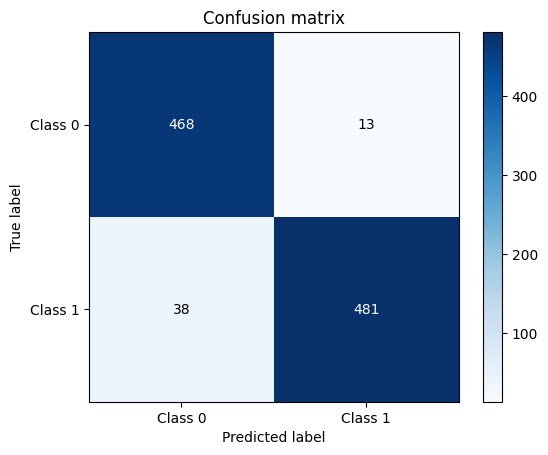

In [ ]:
y_true = np.array(org)
y_pred = np.array(pred)

cm = confusion_matrix(y_true, y_pred)


fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Class 0', 'Class 1'],
       yticklabels=['Class 0', 'Class 1'],
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')


threshold = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > threshold else "black")

# Show plot
plt.savefig('My_Dataset5000_confusion_matrix.png')
plt.show()

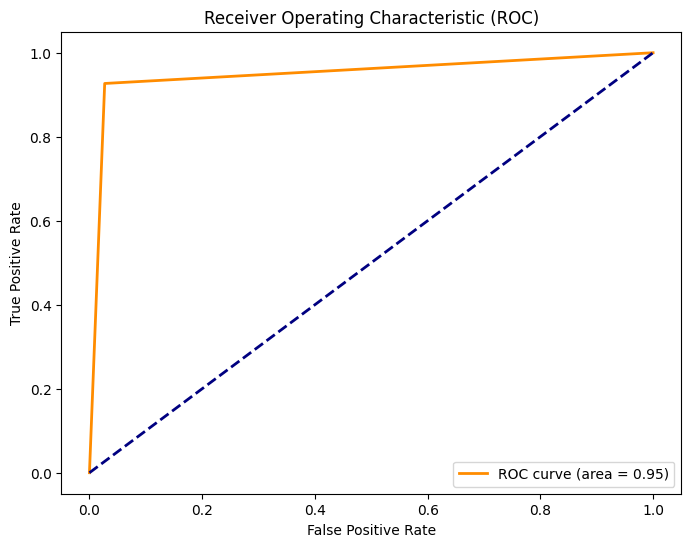

In [ ]:
fpr, tpr, _ = roc_curve(org, pred)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('My_Dataset5000_ROC.png')
plt.show()

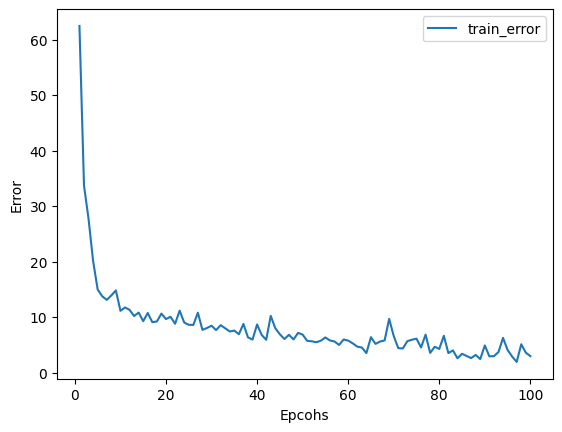

In [ ]:
#@title EpochVSError Plot
x_axis = [i for i in range(1,epoch+1)]
plt.plot(x_axis , train_losses, label='train_error')
plt.legend()
plt.xlabel("Epcohs")
plt.ylabel("Error")
plt.savefig('My_Dataset5000_errorVSepoch.png')
plt.show()

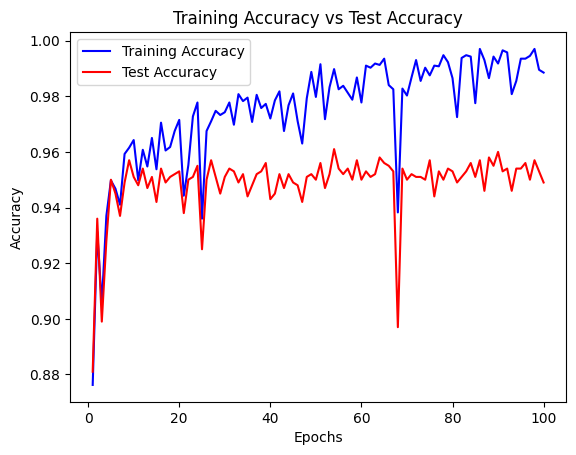

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_axis, train_accuracy, 'b', label='Training Accuracy')
ax.plot(x_axis, test_accuracy, 'r', label='Test Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_title('Training Accuracy vs Test Accuracy')
ax.legend()
plt.savefig('myDataset5000_TrainAccVSTestAcc.png')
plt.show()